In [1]:

import pandas as pd
import numpy as np
import re
import math

import matplotlib.pyplot as plt



In [2]:
#PD status = p131022
# data set before balancing the cases and controls
t= pd.read_csv("PD_classification_8_28_2024.csv")

t

,p131022,zSCORE,p130708,p131600,p131640,p130714,p130770,p130718,p130706,itgav,...,Age_at_recruitment,p22009_a1,p22009_a2,p22009_a3,p22009_a4,p22009_a5,C_12_40220632,G_12_40340400,G_1_155162560,T_1_155235843
0,1,-0.665891,0,0,0,0,0,0,0,0.07385,...,66.0,-12.6405,3.65896,-2.098580,3.162480,-4.340750,0.0,0.0,0.0,0.0
1,1,-0.253906,0,0,0,0,0,0,0,0.16520,...,61.0,-14.3794,4.59548,1.051720,-3.238930,-7.215500,1.0,0.0,0.0,0.0
2,1,-0.606526,0,0,0,0,0,0,0,-0.01645,...,57.0,-12.0136,1.66506,-2.299960,-1.930130,-2.804390,0.0,0.0,0.0,0.0
3,1,-0.645569,0,0,0,0,0,0,0,0.02835,...,67.0,-10.5223,3.03117,-2.723610,-3.139430,-6.322740,1.0,0.0,0.0,0.0
4,1,0.447931,0,0,0,0,0,0,0,0.25300,...,61.0,-11.9374,2.13536,-2.290050,-2.139380,-0.062894,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19973,0,-0.952059,0,0,0,0,0,0,0,0.09640,...,66.0,-11.0127,3.98721,-0.746561,-0.647348,-7.122910,0.0,0.0,0.0,0.0
19974,0,0.191971,0,0,0,0,0,0,0,0.44955,...,67.0,-13.9993,2.79810,-2.446400,5.623330,13.281600,1.0,0.0,0.0,0.0
19975,0,-1.845851,0,0,0,0,0,0,0,-0.01450,...,46.0,-15.9876,4.76636,-1.039990,5.717790,11.104900,0.0,0.0,0.0,0.0
19976,0,0.103075,0,0,0,0,0,0,0,-0.04090,...,58.0,-11.8826,3.45795,-3.435470,-0.134893,-11.634100,0.0,0.0,0.0,0.0


In [3]:
cases = t[t['p131022'] == 1]
controls = t[t['p131022'] == 0]

In [4]:
cases

,p131022,zSCORE,p130708,p131600,p131640,p130714,p130770,p130718,p130706,itgav,...,Age_at_recruitment,p22009_a1,p22009_a2,p22009_a3,p22009_a4,p22009_a5,C_12_40220632,G_12_40340400,G_1_155162560,T_1_155235843
0,1,-0.665891,0,0,0,0,0,0,0,0.07385,...,66.0,-12.6405,3.65896,-2.098580,3.162480,-4.340750,0.0,0.0,0.0,0.0
1,1,-0.253906,0,0,0,0,0,0,0,0.16520,...,61.0,-14.3794,4.59548,1.051720,-3.238930,-7.215500,1.0,0.0,0.0,0.0
2,1,-0.606526,0,0,0,0,0,0,0,-0.01645,...,57.0,-12.0136,1.66506,-2.299960,-1.930130,-2.804390,0.0,0.0,0.0,0.0
3,1,-0.645569,0,0,0,0,0,0,0,0.02835,...,67.0,-10.5223,3.03117,-2.723610,-3.139430,-6.322740,1.0,0.0,0.0,0.0
4,1,0.447931,0,0,0,0,0,0,0,0.25300,...,61.0,-11.9374,2.13536,-2.290050,-2.139380,-0.062894,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1,1.476090,0,0,0,0,0,0,0,0.20270,...,68.0,-12.7232,8.02833,-0.672770,2.984780,0.988109,0.0,0.0,0.0,0.0
451,1,1.970421,0,0,0,0,0,0,0,-0.15400,...,66.0,-15.2307,4.51217,-2.293020,2.055750,-2.594750,0.0,0.0,0.0,0.0
452,1,1.663435,0,0,0,0,0,0,0,-0.18750,...,64.0,-12.8136,4.72439,0.895692,1.203480,0.537456,1.0,0.0,0.0,0.0
453,1,1.559418,0,0,0,0,0,0,0,-0.00260,...,65.0,-10.6598,3.20204,-0.442649,-1.306010,-2.429280,0.0,0.0,1.0,0.0


In [5]:
cases.shape[0]

455

In [6]:
#Filter Controls by Age
case_age_mean = cases['Year_of_birth'].mean()
case_age_std = cases['Year_of_birth'].std()
controls_filtered = controls[
    (controls['Year_of_birth'] >= case_age_mean - 2 * case_age_std) &  # Adjust the range as needed
    (controls['Year_of_birth'] <= case_age_mean + 2 * case_age_std)
]


In [7]:
under_controls = controls.sample( cases.shape[0], random_state=42)
under_controls

,p131022,zSCORE,p130708,p131600,p131640,p130714,p130770,p130718,p130706,itgav,...,Age_at_recruitment,p22009_a1,p22009_a2,p22009_a3,p22009_a4,p22009_a5,C_12_40220632,G_12_40340400,G_1_155162560,T_1_155235843
3392,0,-0.302099,0,0,0,0,0,0,0,0.15070,...,58.0,-13.53330,6.13330,-4.472240,5.235120,3.555920,0.0,0.0,0.0,0.0
15438,0,0.074625,0,0,0,0,0,0,0,-0.16590,...,52.0,-9.78852,5.23788,-4.525380,-0.543052,-10.503400,0.0,0.0,0.0,0.0
12901,0,-1.647682,0,0,1,0,0,0,0,-0.02210,...,53.0,-11.36900,4.34938,-0.556953,-0.089871,-2.673810,1.0,0.0,0.0,0.0
11959,0,-1.841879,0,0,0,0,0,0,0,-0.09670,...,42.0,-12.85470,3.29065,-3.224170,1.491080,0.122724,0.0,0.0,0.0,0.0
5649,0,-0.730890,0,0,0,0,0,0,0,-0.37415,...,49.0,-12.42130,4.57672,0.086738,1.636460,1.850780,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9692,0,-0.361180,0,0,0,0,0,0,0,-0.12300,...,65.0,-13.17460,2.86768,-2.023910,2.094320,-7.961560,0.0,0.0,0.0,0.0
13802,0,0.041731,0,0,0,0,0,0,0,0.01580,...,67.0,-13.57750,4.25167,-2.952350,-0.932365,-7.173870,0.0,0.0,0.0,0.0
9113,0,-1.726014,0,0,0,0,0,0,0,-0.16340,...,42.0,-12.65010,4.83525,0.104600,1.285610,3.176270,0.0,0.0,0.0,0.0
9106,0,-0.712508,0,0,0,0,0,0,0,-0.26780,...,40.0,-12.89050,5.94781,-3.366960,1.674320,1.813600,0.0,0.0,0.0,0.0


In [8]:
balanced_df = pd.concat([cases, under_controls], axis = 0)
balanced_df

,p131022,zSCORE,p130708,p131600,p131640,p130714,p130770,p130718,p130706,itgav,...,Age_at_recruitment,p22009_a1,p22009_a2,p22009_a3,p22009_a4,p22009_a5,C_12_40220632,G_12_40340400,G_1_155162560,T_1_155235843
0,1,-0.665891,0,0,0,0,0,0,0,0.07385,...,66.0,-12.6405,3.65896,-2.09858,3.162480,-4.340750,0.0,0.0,0.0,0.0
1,1,-0.253906,0,0,0,0,0,0,0,0.16520,...,61.0,-14.3794,4.59548,1.05172,-3.238930,-7.215500,1.0,0.0,0.0,0.0
2,1,-0.606526,0,0,0,0,0,0,0,-0.01645,...,57.0,-12.0136,1.66506,-2.29996,-1.930130,-2.804390,0.0,0.0,0.0,0.0
3,1,-0.645569,0,0,0,0,0,0,0,0.02835,...,67.0,-10.5223,3.03117,-2.72361,-3.139430,-6.322740,1.0,0.0,0.0,0.0
4,1,0.447931,0,0,0,0,0,0,0,0.25300,...,61.0,-11.9374,2.13536,-2.29005,-2.139380,-0.062894,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9692,0,-0.361180,0,0,0,0,0,0,0,-0.12300,...,65.0,-13.1746,2.86768,-2.02391,2.094320,-7.961560,0.0,0.0,0.0,0.0
13802,0,0.041731,0,0,0,0,0,0,0,0.01580,...,67.0,-13.5775,4.25167,-2.95235,-0.932365,-7.173870,0.0,0.0,0.0,0.0
9113,0,-1.726014,0,0,0,0,0,0,0,-0.16340,...,42.0,-12.6501,4.83525,0.10460,1.285610,3.176270,0.0,0.0,0.0,0.0
9106,0,-0.712508,0,0,0,0,0,0,0,-0.26780,...,40.0,-12.8905,5.94781,-3.36696,1.674320,1.813600,0.0,0.0,0.0,0.0


In [9]:
balanced_df.columns

Index(['p131022', 'zSCORE', 'p130708', 'p131600', 'p131640', 'p130714',
       'p130770', 'p130718', 'p130706', 'itgav', 'vat1', 'egfr', 'megf9',
       'adgrg2', 'tnxb', 'itgam', 'il13ra1', 'itgb1', 'clec10a', 'itga11',
       'setmar', 'itgb2', 'hpgds', 'bag3', 'eps8l2', 'cdon', 'ptprn2', 'scg2',
       'klk8', 'dctpp1', 'crhbp', 'ifnlr1', 'tppp3', 'angptl3', 'hnmt', 'comp',
       'furin', 'tafa5', 'cxcl17', 'enah', 'sftpd', 'cd276', 'nefl',
       'Year_of_birth', 'Townsend_deprivation_index', 'sex',
       'Age_at_recruitment', 'p22009_a1', 'p22009_a2', 'p22009_a3',
       'p22009_a4', 'p22009_a5', 'C_12_40220632', 'G_12_40340400',
       'G_1_155162560', 'T_1_155235843'],
      dtype='object')

In [10]:
#t2 = t.drop(['eid','APOE_GENOTYPE', 'Year_of_birth','Apo_E4E4' ], axis = 1)
t2 = balanced_df.drop(['Year_of_birth' ], axis = 1)

In [11]:
t2.columns

Index(['p131022', 'zSCORE', 'p130708', 'p131600', 'p131640', 'p130714',
       'p130770', 'p130718', 'p130706', 'itgav', 'vat1', 'egfr', 'megf9',
       'adgrg2', 'tnxb', 'itgam', 'il13ra1', 'itgb1', 'clec10a', 'itga11',
       'setmar', 'itgb2', 'hpgds', 'bag3', 'eps8l2', 'cdon', 'ptprn2', 'scg2',
       'klk8', 'dctpp1', 'crhbp', 'ifnlr1', 'tppp3', 'angptl3', 'hnmt', 'comp',
       'furin', 'tafa5', 'cxcl17', 'enah', 'sftpd', 'cd276', 'nefl',
       'Townsend_deprivation_index', 'sex', 'Age_at_recruitment', 'p22009_a1',
       'p22009_a2', 'p22009_a3', 'p22009_a4', 'p22009_a5', 'C_12_40220632',
       'G_12_40340400', 'G_1_155162560', 'T_1_155235843'],
      dtype='object')

In [12]:
X_combined_model = t2.drop(['p131022'], axis = 1).copy()
y = t2['p131022'].copy()

In [13]:

# divide the combined to following feature sets 

X_genetics_info = t2.drop(['p131022', 'p130708', 'p131600', 'p131640', 'p130714',
       'p130770', 'p130718', 'p130706', 'itgav', 'vat1', 'egfr', 'megf9',
       'adgrg2', 'tnxb', 'itgam', 'il13ra1', 'itgb1', 'clec10a', 'itga11',
       'setmar', 'itgb2', 'hpgds', 'bag3', 'eps8l2', 'cdon', 'ptprn2', 'scg2',
       'klk8', 'dctpp1', 'crhbp', 'ifnlr1', 'tppp3', 'angptl3', 'hnmt', 'comp',
       'furin', 'tafa5', 'cxcl17', 'enah', 'sftpd', 'cd276', 'nefl',
       'Townsend_deprivation_index', 'sex', 'Age_at_recruitment' ], axis = 1).copy()

X_olink_info = t2.drop(['p131022', 'zSCORE', 'p130708', 'p131600', 'p131640', 'p130714',
       'p130770', 'p130718', 'p130706',
       'Townsend_deprivation_index', 'sex', 'Age_at_recruitment', 'p22009_a1',
       'p22009_a2', 'p22009_a3', 'p22009_a4', 'p22009_a5', 'C_12_40220632',
       'G_12_40340400', 'G_1_155162560', 'T_1_155235843' ], axis = 1).copy()

X_clinical_info = t2.drop(['p131022', 'zSCORE', 'itgav', 'vat1', 'egfr', 'megf9',
       'adgrg2', 'tnxb', 'itgam', 'il13ra1', 'itgb1', 'clec10a', 'itga11',
       'setmar', 'itgb2', 'hpgds', 'bag3', 'eps8l2', 'cdon', 'ptprn2', 'scg2',
       'klk8', 'dctpp1', 'crhbp', 'ifnlr1', 'tppp3', 'angptl3', 'hnmt', 'comp',
       'furin', 'tafa5', 'cxcl17', 'enah', 'sftpd', 'cd276', 'nefl',
       'Townsend_deprivation_index', 'sex', 'Age_at_recruitment', 'p22009_a1',
       'p22009_a2', 'p22009_a3', 'p22009_a4', 'p22009_a5', 'C_12_40220632',
       'G_12_40340400', 'G_1_155162560', 'T_1_155235843'], axis = 1).copy()

X_demographics_info = t2.drop(['p131022', 'zSCORE', 'p130708', 'p131600', 'p131640', 'p130714',
       'p130770', 'p130718', 'p130706', 'itgav', 'vat1', 'egfr', 'megf9',
       'adgrg2', 'tnxb', 'itgam', 'il13ra1', 'itgb1', 'clec10a', 'itga11',
       'setmar', 'itgb2', 'hpgds', 'bag3', 'eps8l2', 'cdon', 'ptprn2', 'scg2',
       'klk8', 'dctpp1', 'crhbp', 'ifnlr1', 'tppp3', 'angptl3', 'hnmt', 'comp',
       'furin', 'tafa5', 'cxcl17', 'enah', 'sftpd', 'cd276', 'nefl',
        'p22009_a1',
       'p22009_a2', 'p22009_a3', 'p22009_a4', 'p22009_a5', 'C_12_40220632',
       'G_12_40340400', 'G_1_155162560', 'T_1_155235843' ], axis = 1).copy()

X_combined_without_clinical_info = t2.drop(['p131022', 'p130708', 'p131600', 'p131640', 'p130714',
       'p130770', 'p130718', 'p130706',
       'Townsend_deprivation_index', 'sex', 'Age_at_recruitment' ], axis = 1).copy()

In [14]:
X_combined_model

,zSCORE,p130708,p131600,p131640,p130714,p130770,p130718,p130706,itgav,vat1,...,Age_at_recruitment,p22009_a1,p22009_a2,p22009_a3,p22009_a4,p22009_a5,C_12_40220632,G_12_40340400,G_1_155162560,T_1_155235843
0,-0.665891,0,0,0,0,0,0,0,0.07385,0.11110,...,66.0,-12.6405,3.65896,-2.09858,3.162480,-4.340750,0.0,0.0,0.0,0.0
1,-0.253906,0,0,0,0,0,0,0,0.16520,0.25560,...,61.0,-14.3794,4.59548,1.05172,-3.238930,-7.215500,1.0,0.0,0.0,0.0
2,-0.606526,0,0,0,0,0,0,0,-0.01645,0.02690,...,57.0,-12.0136,1.66506,-2.29996,-1.930130,-2.804390,0.0,0.0,0.0,0.0
3,-0.645569,0,0,0,0,0,0,0,0.02835,0.30630,...,67.0,-10.5223,3.03117,-2.72361,-3.139430,-6.322740,1.0,0.0,0.0,0.0
4,0.447931,0,0,0,0,0,0,0,0.25300,-0.08070,...,61.0,-11.9374,2.13536,-2.29005,-2.139380,-0.062894,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9692,-0.361180,0,0,0,0,0,0,0,-0.12300,0.03060,...,65.0,-13.1746,2.86768,-2.02391,2.094320,-7.961560,0.0,0.0,0.0,0.0
13802,0.041731,0,0,0,0,0,0,0,0.01580,-0.22550,...,67.0,-13.5775,4.25167,-2.95235,-0.932365,-7.173870,0.0,0.0,0.0,0.0
9113,-1.726014,0,0,0,0,0,0,0,-0.16340,-0.21205,...,42.0,-12.6501,4.83525,0.10460,1.285610,3.176270,0.0,0.0,0.0,0.0
9106,-0.712508,0,0,0,0,0,0,0,-0.26780,-0.02430,...,40.0,-12.8905,5.94781,-3.36696,1.674320,1.813600,0.0,0.0,0.0,0.0


In [15]:
X_clinical_info 

,p130708,p131600,p131640,p130714,p130770,p130718,p130706
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9692,0,0,0,0,0,0,0
13802,0,0,0,0,0,0,0
9113,0,0,0,0,0,0,0
9106,0,0,0,0,0,0,0


In [16]:
X_combined_without_clinical_info

,zSCORE,itgav,vat1,egfr,megf9,adgrg2,tnxb,itgam,il13ra1,itgb1,...,nefl,p22009_a1,p22009_a2,p22009_a3,p22009_a4,p22009_a5,C_12_40220632,G_12_40340400,G_1_155162560,T_1_155235843
0,-0.665891,0.07385,0.11110,-0.12215,-0.0771,-0.12960,0.00760,-0.06640,-0.16845,0.10900,...,0.8732,-12.6405,3.65896,-2.09858,3.162480,-4.340750,0.0,0.0,0.0,0.0
1,-0.253906,0.16520,0.25560,0.21465,0.1895,0.15070,-0.18815,0.16745,0.45050,0.25905,...,0.2420,-14.3794,4.59548,1.05172,-3.238930,-7.215500,1.0,0.0,0.0,0.0
2,-0.606526,-0.01645,0.02690,0.19595,0.0575,0.23100,-0.01420,0.31180,-0.18905,0.03770,...,0.0911,-12.0136,1.66506,-2.29996,-1.930130,-2.804390,0.0,0.0,0.0,0.0
3,-0.645569,0.02835,0.30630,-0.13785,-0.2770,-0.75920,-0.21080,-0.12670,0.75445,-0.31650,...,0.5094,-10.5223,3.03117,-2.72361,-3.139430,-6.322740,1.0,0.0,0.0,0.0
4,0.447931,0.25300,-0.08070,0.08200,-0.0937,-0.13640,-0.22360,0.12745,-0.36240,-0.03605,...,0.0621,-11.9374,2.13536,-2.29005,-2.139380,-0.062894,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9692,-0.361180,-0.12300,0.03060,-0.55935,-0.2398,0.26165,-0.29385,-0.52085,-0.30170,-0.14105,...,0.3266,-13.1746,2.86768,-2.02391,2.094320,-7.961560,0.0,0.0,0.0,0.0
13802,0.041731,0.01580,-0.22550,0.07325,0.0782,0.57350,0.24655,0.18975,0.01670,0.29595,...,0.2116,-13.5775,4.25167,-2.95235,-0.932365,-7.173870,0.0,0.0,0.0,0.0
9113,-1.726014,-0.16340,-0.21205,0.12280,-0.1454,-0.00070,0.01620,-0.24300,0.04660,-0.37795,...,0.5521,-12.6501,4.83525,0.10460,1.285610,3.176270,0.0,0.0,0.0,0.0
9106,-0.712508,-0.26780,-0.02430,-0.07370,-0.3205,-0.24090,0.04060,-0.57245,-0.13890,-0.32395,...,-1.1445,-12.8905,5.94781,-3.36696,1.674320,1.813600,0.0,0.0,0.0,0.0


In [20]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, confusion_matrix
import numpy as np
import pandas as pd

# Ensure y is a numpy array
y = y.values if isinstance(y, pd.Series) else y

# Data preparation
feature_sets = {
    'Combined': X_combined_model,
    'Genetics': X_genetics_info,
    'Clinical': X_clinical_info,
    'Olink': X_olink_info,
    'Demographics': X_demographics_info,
    'combined_without_clinical': X_combined_without_clinical_info
}

# Define a parameter grid for Gradient Boosting
# Define a parameter grid for Gradient Boosting
param_grid = {
    'xgb__n_estimators': [300, 500, 1000],
    'xgb__learning_rate': [0.005, 0.01],
    'xgb__max_depth': [1, 2]
}
param_grid = {
    'xgb__n_estimators': [1, 2, 3, 5, 10, 15],
    'xgb__learning_rate': [0.0001, 0.001, 0.01],
    'xgb__max_depth': [1, 2, 3, 5]
}

# Initialize metrics storage
metrics = []

# Outer CV loop
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each feature set
for label, X in feature_sets.items():
    if not label == 'Combined':
        continue
    # Metrics for the current feature set
    feature_metrics = []

    # Outer CV
    for train_index, test_index in outer_cv.split(X, y):
        # Split data into training and test sets for the outer CV
        X_train_outer, X_test_outer = X.iloc[train_index], X.iloc[test_index]
        y_train_outer, y_test_outer = y[train_index], y[test_index]

        # Define pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('xgb', XGBClassifier())
        ])

        # Inner CV loop for hyperparameter tuning
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='roc_auc', verbose=1, n_jobs=-1)
        
        grid_search.fit(X_train_outer, y_train_outer)

        # Best model evaluation
        best_model = grid_search.best_estimator_

        # Predict probabilities and classes for both training and test sets
        train_probabilities = best_model.predict_proba(X_train_outer)[:, 1]
        test_probabilities = best_model.predict_proba(X_test_outer)[:, 1]
        y_train_pred = best_model.predict(X_train_outer)
        y_test_pred = best_model.predict(X_test_outer)

        # Calculate ROC AUC and Balanced Accuracy for both sets
        train_auc = roc_auc_score(y_train_outer, train_probabilities)
        test_auc = roc_auc_score(y_test_outer, test_probabilities)
        balanced_acc_train = balanced_accuracy_score(y_train_outer, y_train_pred)
        balanced_acc_test = balanced_accuracy_score(y_test_outer, y_test_pred)

        # Calculate confusion matrix and derive sensitivity and specificity
        tn, fp, fn, tp = confusion_matrix(y_test_outer, y_test_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        # Store metrics
        feature_metrics.append({
            'Train AUC': train_auc,
            'Test AUC': test_auc,
            'Train Balanced Accuracy': balanced_acc_train,
            'Test Balanced Accuracy': balanced_acc_test,
            'Sensitivity': sensitivity,
            'Specificity': specificity
        })

    # Average metrics for the current feature set
    avg_metrics = {
        'Feature Set': label,
        'Train AUC': np.mean([m['Train AUC'] for m in feature_metrics]),
        'Test AUC': np.mean([m['Test AUC'] for m in feature_metrics]),
        'Train Balanced Accuracy': np.mean([m['Train Balanced Accuracy'] for m in feature_metrics]),
        'Test Balanced Accuracy': np.mean([m['Test Balanced Accuracy'] for m in feature_metrics]),
        'Sensitivity': np.mean([m['Sensitivity'] for m in feature_metrics]),
        'Specificity': np.mean([m['Specificity'] for m in feature_metrics])
    }
    metrics.append(avg_metrics)

# Create DataFrame from metrics
metrics_df = pd.DataFrame(metrics)
# Save DataFrame to a CSV file
metrics_df.to_csv('PD_metrics.csv', index=False)

metrics_df

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


,Feature Set,Train AUC,Test AUC,Train Balanced Accuracy,Test Balanced Accuracy,Sensitivity,Specificity
0,Combined,0.825266,0.749088,0.749176,0.698901,0.784615,0.613187


In [21]:
X = feature_sets['Combined'] # X_combined_model.shape
# Create Explainer and get shap_values
import shap
from sklearn.metrics import r2_score

from lightgbm import LGBMRegressor
y_regr = best_model.predict_proba(X)[:, 1]
model = LGBMRegressor()
model.fit(X, y_regr)
y_pred = model.predict(X)
explainer = shap.Explainer(model, X)
my_shap_values = explainer(X, check_additivity=False)

/home/anant/anaconda3/envs/msproject/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/anant/anaconda3/envs/msproject/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_min

In [22]:
print ("R squared_error: ", r2_score(y_regr, y_pred))
print (roc_auc_score(y, y_pred))

R squared_error:  0.9959728544878118
0.7828329911846396


In [23]:
import gzip
from pathlib import Path
import joblib
fpth = Path("/home/anant/Documents/MohammadProject/classification/NDDsImagingStreamlitApp")
joblib.dump(model, fpth / 'pd_reduced_lgb_ms.pkl')

f = gzip.GzipFile(fpth / 'pd_shap_object_values_ms.npy.gz', "w")
np.save(f, my_shap_values.values, allow_pickle=False)

f = gzip.GzipFile(fpth / 'pd_shap_object_base_values_ms.npy.gz', "w")
np.save(f, my_shap_values.base_values, allow_pickle=False)

f = gzip.GzipFile(fpth / 'pd_shap_object_data_ms.npy.gz', "w")
np.save(f, my_shap_values.data, allow_pickle=False)

feature_names = np.array(X.columns, dtype='<U53')
f = gzip.GzipFile(fpth / 'pd_shap_object_feature_names_ms.npy.gz', "w")
np.save(f, feature_names, allow_pickle=False)

with open(fpth  /"pd_top20_feature_list_ms.txt", 'w') as f:
  f.write("\n".join(list(X.columns)))

X.sample(10).to_csv(fpth / "sample_dataset_PD_MS.csv", index=False)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each

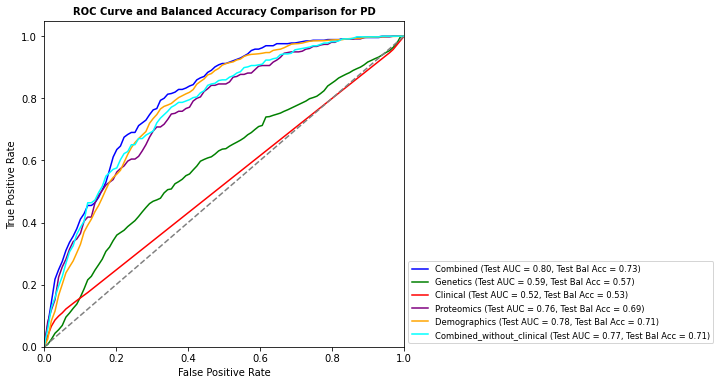

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pandas as pd

# Data preparation
feature_sets = {
    'Combined': X_combined_model,
    'Genetics': X_genetics_info,
    'Clinical': X_clinical_info,
    'Proteomics': X_olink_info,
    'Demographics': X_demographics_info,
    'Combined_without_clinical': X_combined_without_clinical_info
}

# Define a parameter grid for Gradient Boosting
param_grid = {
    'xgb__n_estimators': [300, 500, 1000],
    'xgb__learning_rate': [0.005, 0.01],
    'xgb__max_depth': [1, 2]
}

# Initialize metrics storage
metrics = []

# Outer CV loop
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a list of colors
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Initialize plot for ROC curves
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each feature set
for idx, (label, X) in enumerate(feature_sets.items()):
    # Metrics for the current feature set
    feature_metrics = []

    # Outer CV
    for train_index, test_index in outer_cv.split(X, y):
        # Split data into training and test sets for the outer CV
        X_train_outer, X_test_outer = X.iloc[train_index], X.iloc[test_index]
        y_train_outer, y_test_outer = y[train_index], y[test_index]

        # Define pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('xgb', XGBClassifier())
        ])

        # Inner CV loop for hyperparameter tuning
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='roc_auc', verbose=1, n_jobs=-1)
        grid_search.fit(X_train_outer, y_train_outer)

        # Best model evaluation
        best_model = grid_search.best_estimator_

        # Predict probabilities for test set
        test_probabilities = best_model.predict_proba(X_test_outer)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_outer, test_probabilities)
        auc = roc_auc_score(y_test_outer, test_probabilities)
        balanced_acc = balanced_accuracy_score(y_test_outer, best_model.predict(X_test_outer))

        # Store metrics
        feature_metrics.append({
            'FPR': fpr,
            'TPR': tpr,
            'AUC': auc,
            'Balanced Accuracy': balanced_acc
        })

    # Average metrics for the current feature set
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)
    mean_auc = 0
    mean_balanced_acc = 0
    n_splits = len(feature_metrics)

    for metrics in feature_metrics:
        fpr = metrics['FPR']
        tpr = metrics['TPR']
        auc = metrics['AUC']
        balanced_acc = metrics['Balanced Accuracy']

        # Interpolate the TPR values to match the common FPR values
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_auc += auc / n_splits
        mean_balanced_acc += balanced_acc / n_splits

    mean_tpr /= n_splits
    mean_tpr[0] = 0  # Ensure the curve starts at (0,0)

    # Plot ROC curve with custom color
    color = color_list[idx % len(color_list)]  # Cycle through colors if more feature sets than colors
    ax.plot(mean_fpr, mean_tpr, color=color, 
            label=f'{label} (Test AUC = {mean_auc:.2f}, Test Bal Acc = {mean_balanced_acc:.2f})')

# Plot settings
ax.plot([0, 1], [0, 1], '--', color='grey')  # Diagonal line for random classifier
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Customize title and labels with default font
title_font = {'fontsize': 10, 'fontweight': 'bold'}
label_font = {'fontsize': 10}

ax.set_xlabel('False Positive Rate', **label_font)
ax.set_ylabel('True Positive Rate', **label_font)
ax.set_title('ROC Curve and Balanced Accuracy Comparison for PD', **title_font)

# Set the legend with smaller font size and marker scale
ax.legend(loc='lower left', bbox_to_anchor=(1, 0), bbox_transform=ax.transAxes, fontsize='small', markerscale=0.75)

# Adjust layout to make room for the legend
plt.subplots_adjust(right=0.75)

# Save the plot to a file
plt.savefig('model_comparison_plot.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()
